In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Hyperparameters
input_size = 28 * 28  # MNIST images are 28x28
hidden_size = 128
num_classes = 10
num_epochs = 5
batch_size = 64
learning_rate = 0.001

In [3]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


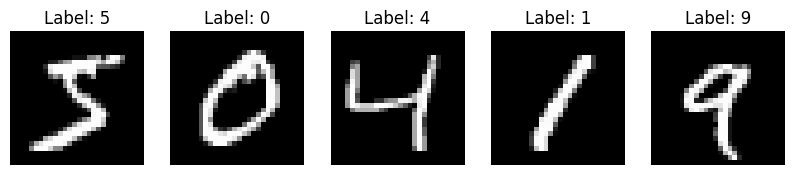

In [4]:
# Display some images from the training set
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i in range(num_images):
        img, label = dataset[i]
        img = img.squeeze().numpy()  # Remove batch dimension and convert to numpy
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

show_images(train_dataset)


In [5]:
# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)


In [6]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/938], Loss: 0.5210
Epoch [1/5], Step [200/938], Loss: 0.3153
Epoch [1/5], Step [300/938], Loss: 0.4728
Epoch [1/5], Step [400/938], Loss: 0.3402
Epoch [1/5], Step [500/938], Loss: 0.1782
Epoch [1/5], Step [600/938], Loss: 0.2366
Epoch [1/5], Step [700/938], Loss: 0.2423
Epoch [1/5], Step [800/938], Loss: 0.2501
Epoch [1/5], Step [900/938], Loss: 0.3009
Epoch [2/5], Step [100/938], Loss: 0.2046
Epoch [2/5], Step [200/938], Loss: 0.1566
Epoch [2/5], Step [300/938], Loss: 0.2545
Epoch [2/5], Step [400/938], Loss: 0.1141
Epoch [2/5], Step [500/938], Loss: 0.0604
Epoch [2/5], Step [600/938], Loss: 0.1658
Epoch [2/5], Step [700/938], Loss: 0.2766
Epoch [2/5], Step [800/938], Loss: 0.1519
Epoch [2/5], Step [900/938], Loss: 0.1968
Epoch [3/5], Step [100/938], Loss: 0.1792
Epoch [3/5], Step [200/938], Loss: 0.3329
Epoch [3/5], Step [300/938], Loss: 0.0838
Epoch [3/5], Step [400/938], Loss: 0.1609
Epoch [3/5], Step [500/938], Loss: 0.1103
Epoch [3/5], Step [600/938], Loss:

In [7]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')
# %%

Accuracy of the model on the 10000 test images: 96.87%
